## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import random 
random.seed(123)

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [193]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [194]:
a=-1
b=2
y=a*X+b 

from sklearn.utils import shuffle
X ,y = shuffle(X, y, random_state=0)

### Plot X vs. y

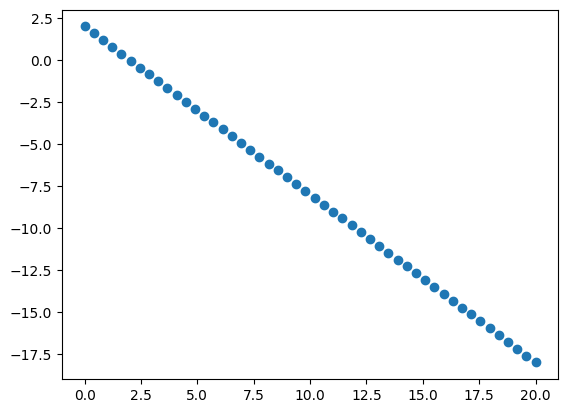

In [195]:
plt.plot(X,y,'o')

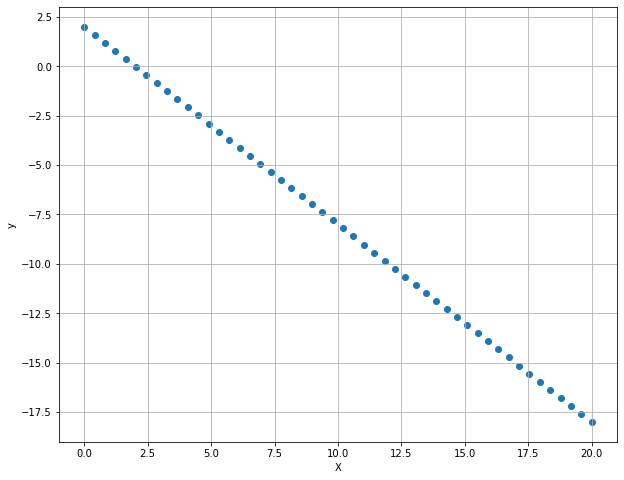

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [202]:
def GD(X,y,alpha,max_iter):

    m = len(X)
    theta_0=0
    theta_1=0
    theta_0_list = []
    theta_1_list = []
    loss = []

    for i in range(max_iter):
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        h_x = theta_1*X + theta_0 
        e = (h_x - y)
        J= (1/(2*m))*e@e
        loss.append(J)

        gred_theta_0 = (e.sum())/m
        gred_theta_1 = (X@e)/m

        grad_vec = np.array([gred_theta_0,gred_theta_1])
        grad_vec_norm = np.linalg.norm(grad_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or grad_vec_norm < 0.001):
            print("********************* Training Report *************************\n")
            print(f'Gradient Descent converged after {i+1} iterations\n')
            print('cost=',J,'\n')
            print('Gradient Vector',grad_vec,'\n')
            print('Gradient Vector Norm:',grad_vec_norm,'\n')
            print(f'optimal theta_0: {theta_0}\noptimal theta_1: {theta_1}')
            return theta_0, theta_1, theta_0_list, theta_1_list, loss
            break

        theta_0 = theta_0 - (alpha*gred_theta_0)
        theta_1 = theta_1 - (alpha*gred_theta_1)



#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [203]:
alpha = 0.0005
max_iter = 300
theta_0, theta_1, theta_0_list, theta_1_list, loss = GD(X,y,alpha,max_iter)

********************* Training Report *************************

Gradient Descent converged after 66 iterations

cost= 0.5444197405452696 

Gradient Vector [-0.43465438  1.24108031] 

Gradient Vector Norm: 1.3149923078513828 

optimal theta_0: -0.04520484208674774
optimal theta_1: -0.8389449533386489


# Hide

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

# End Hide

In [168]:
from sklearn.metrics import r2_score
y_pred = theta_0 + theta_1*X
r2_score(y,y_pred)

0.9686158031920962

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [239]:
def plots(loss,theta_0_list,theta_1_list,X,y,index):
    fig, ax = plt.subplots(4,1,figsize=(8,25))

    #loss vs. Epochs
    ax[0].set_title('loss vs. Epochs')
    ax[0].plot(loss[:index],"o-",markersize=5)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')


    #loss vs. Theta_0
    ax[1].set_title('loss vs. Theta_0')
    ax[1].plot(theta_0_list[:index],loss[:index],"o-",markersize=5)
    ax[1].set_xlabel('Theta_0')
    ax[1].set_ylabel('Loss')

    #loss vs. Theta_1
    ax[2].set_title('loss vs. Theta_1')
    ax[2].plot(theta_1_list[:index],loss[:index],"o-",markersize=5)
    ax[2].set_xlabel('Theta_1')
    ax[2].set_ylabel('Loss')


    for i in range(len(theta_0_list)):
        y_pred = theta_0_list[i] + theta_1_list[i]*X
        ax[3].plot(X,y_pred,'r')

    ax[3].plot(X,y,'o')
    ax[3].set_xlabel('X')
    ax[3].set_ylabel('Y')

    plt.show()

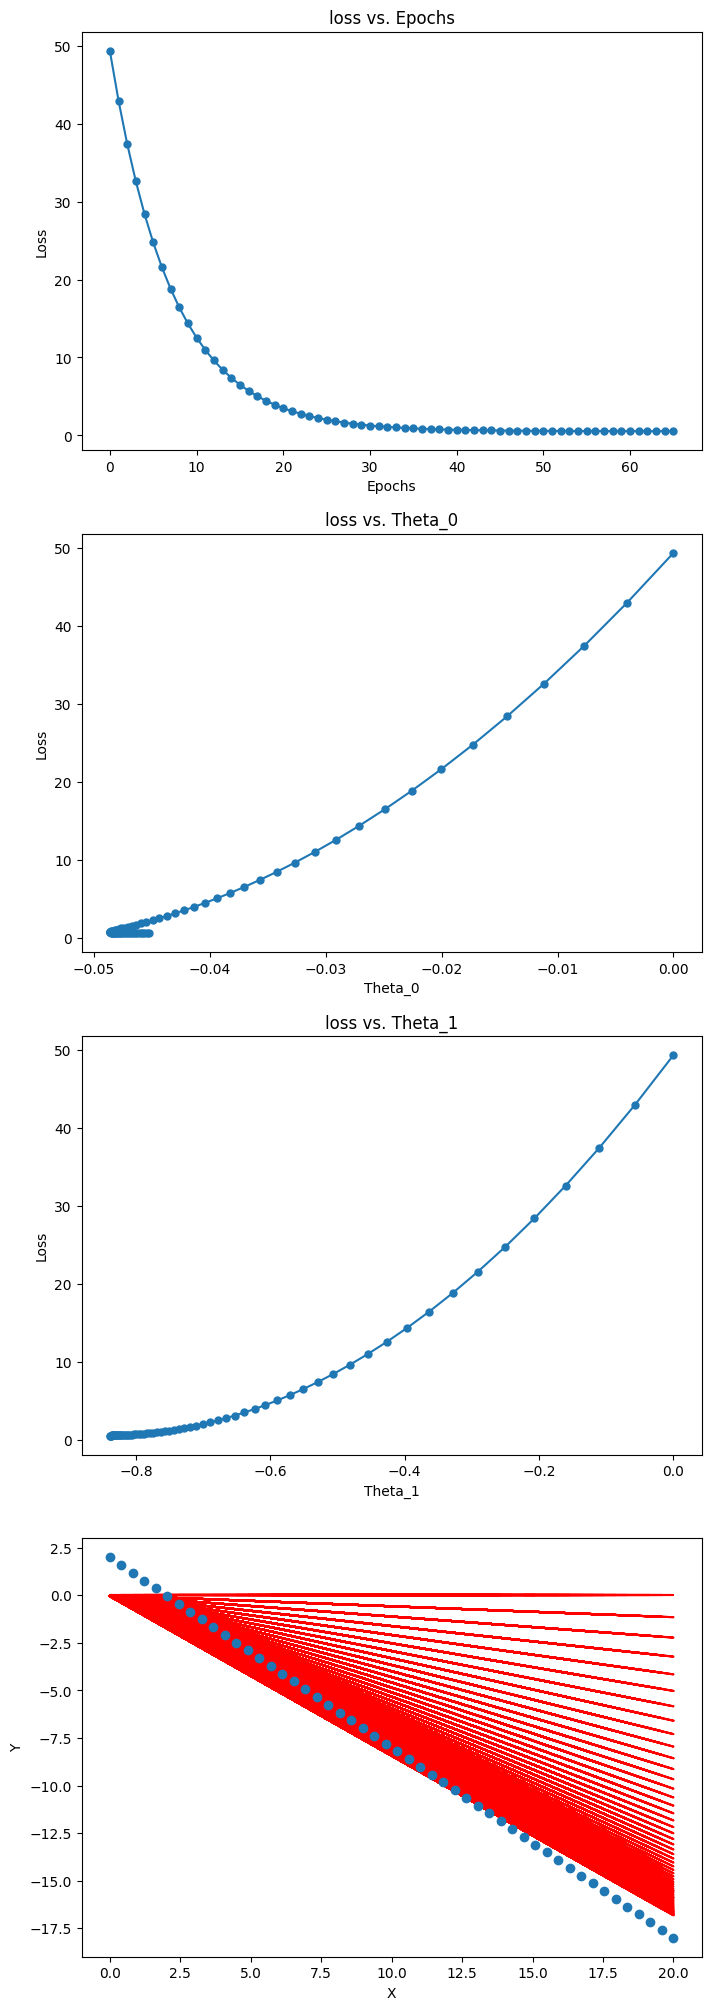

In [169]:
plots(loss,theta_0_list,theta_1_list,X,y,70)

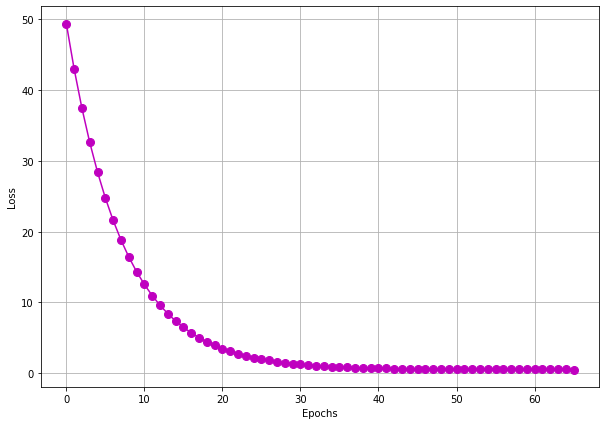

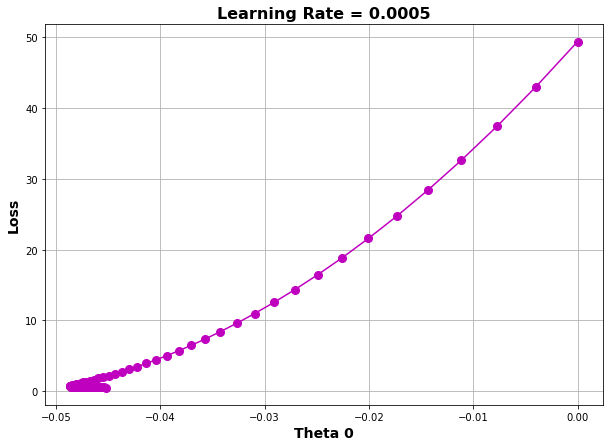

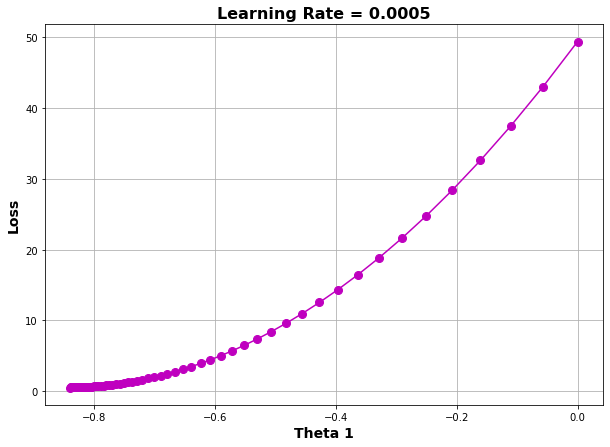

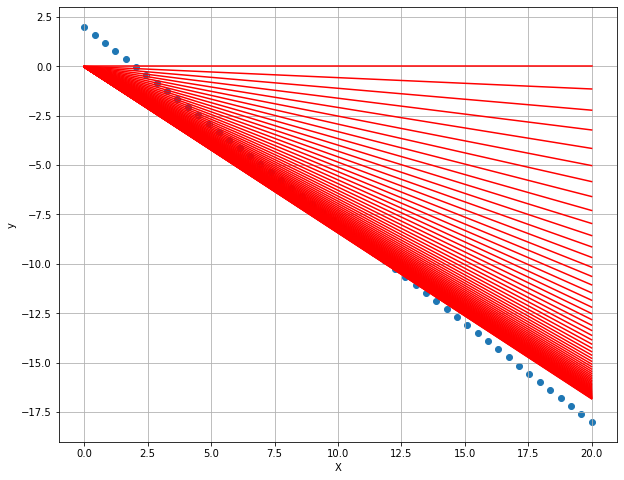

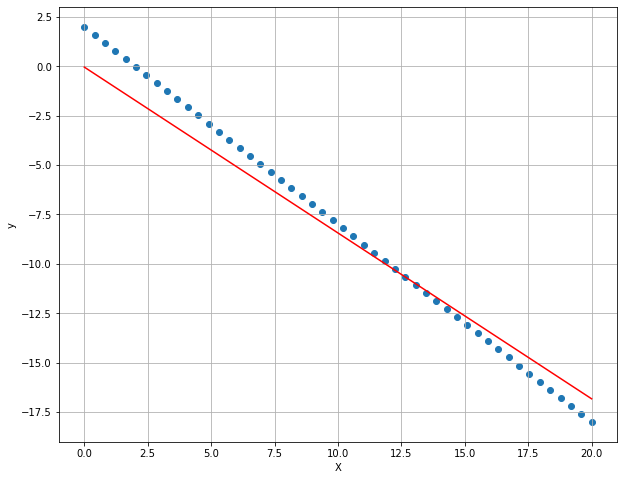

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [171]:
def momentGD(X,y,alpha,gamma,max_iter):

    m = len(X)
    theta_0=0
    theta_1=0
    m0=0
    m1=0
    theta_0_list = []
    theta_1_list = []
    loss = []

    for i in range(max_iter):
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        h_x = theta_0 + theta_1*X
        e = (h_x - y)
        J= (1/(2*m))*e@e
        loss.append(J)

        gred_theta_0 = (e.sum())/m
        gred_theta_1 = (np.vdot(X,e))/m

        grad_vec = np.array([gred_theta_0,gred_theta_1])
        grad_vec_norm = np.linalg.norm(grad_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or grad_vec_norm < 0.001):            
            break
        
        m0 = (gamma*m0) + (alpha*gred_theta_0)
        m1 = (gamma*m1) + (alpha*gred_theta_1)
        theta_0 = theta_0 - m0
        theta_1 = theta_1 - m1

    print("********************* Training Report *************************\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('cost=',J,'\n')
    print('Gradient Vector',grad_vec,'\n')
    print('Gradient Vector Norm:',grad_vec_norm,'\n')
    print(f'optimal theta_0: {theta_0}\noptimal theta_1: {theta_1}')
    return theta_0, theta_1, theta_0_list, theta_1_list, loss


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [172]:
alpha = 0.0005
gamma = 0.5
max_iter = 30000
theta_0, theta_1, theta_0_list, theta_1_list, loss = momentGD(X,y,alpha,gamma,max_iter)

********************* Training Report *************************

Gradient Descent converged after 31 iterations

cost= 0.5414103841082126 

Gradient Vector [-0.47902812  0.65086923] 

Gradient Vector Norm: 0.8081452220675406 

optimal theta_0: -0.04735972918207644
optimal theta_1: -0.8431668394470035


# Hide

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

# End Hide

In [173]:
y_pred = theta_0 + theta_1*X
r2_score(y,y_pred)

0.9687892837396442

r2_score: 0.9687892837396442


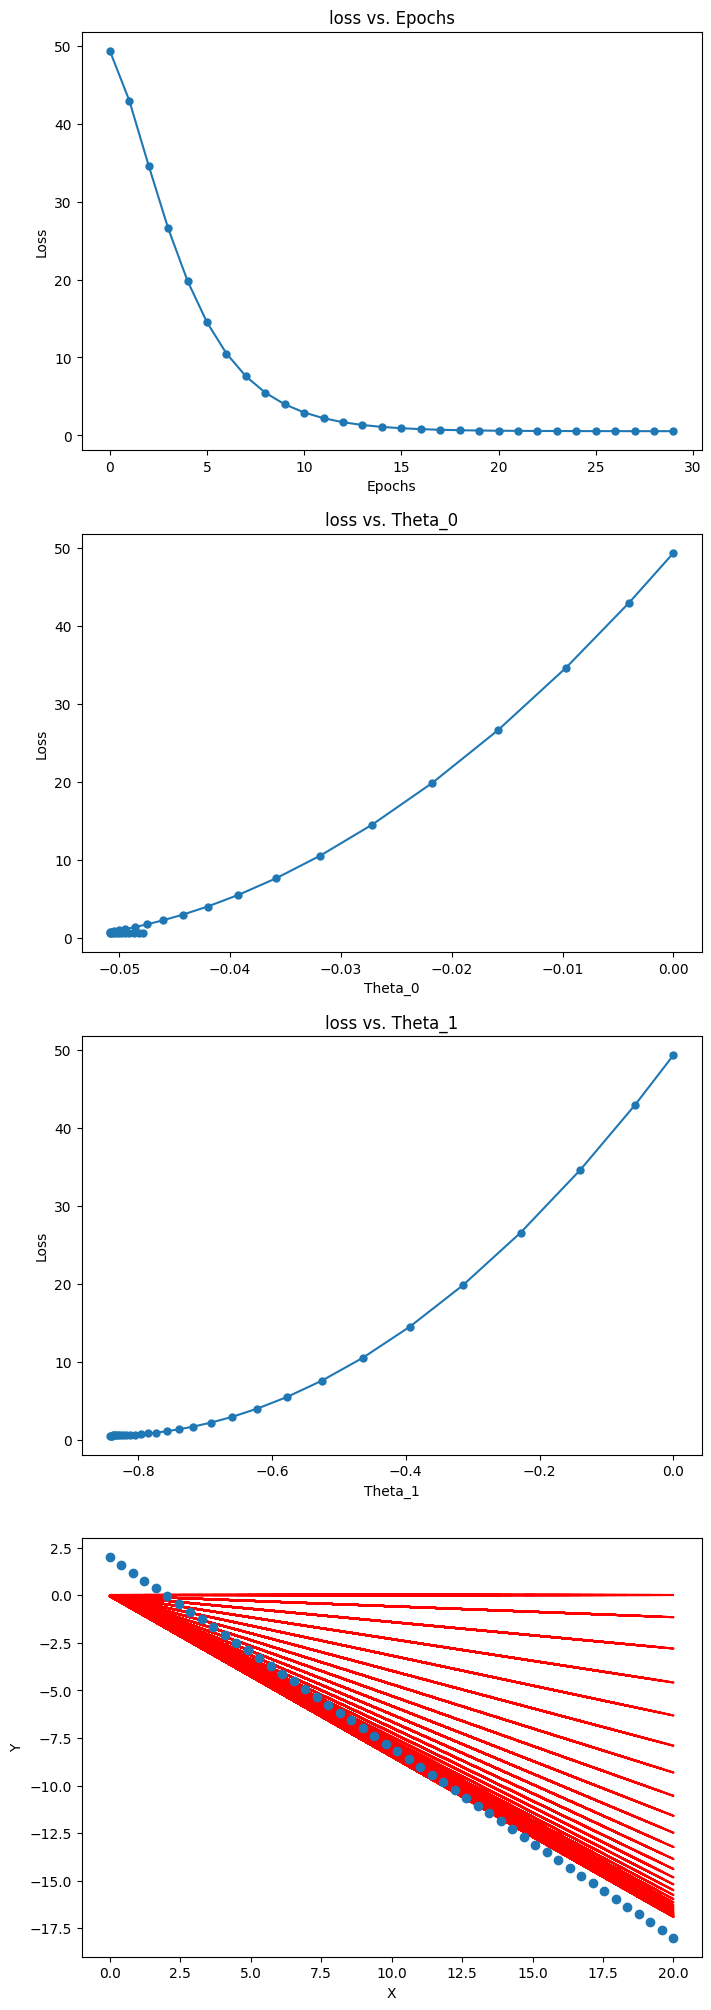

In [174]:
#gamma = 0.5
plots(loss,theta_0_list,theta_1_list,X,y,30)

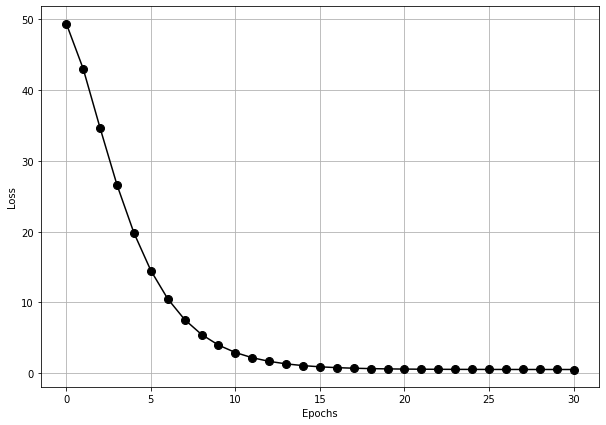

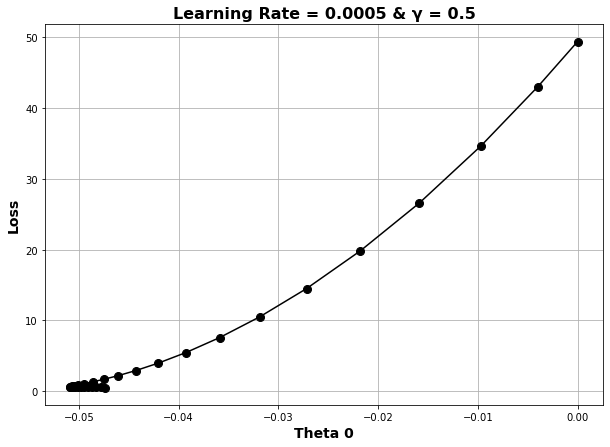

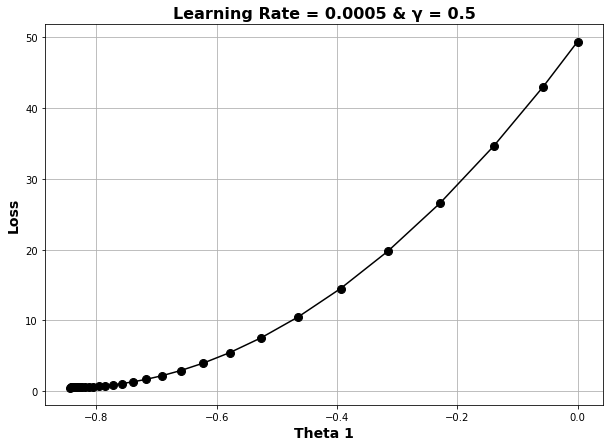

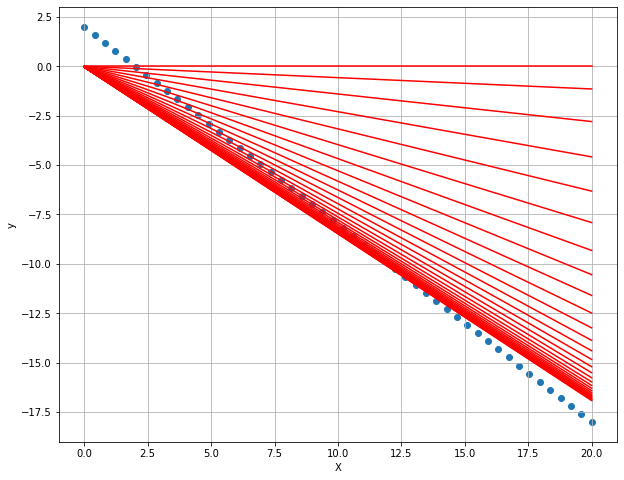

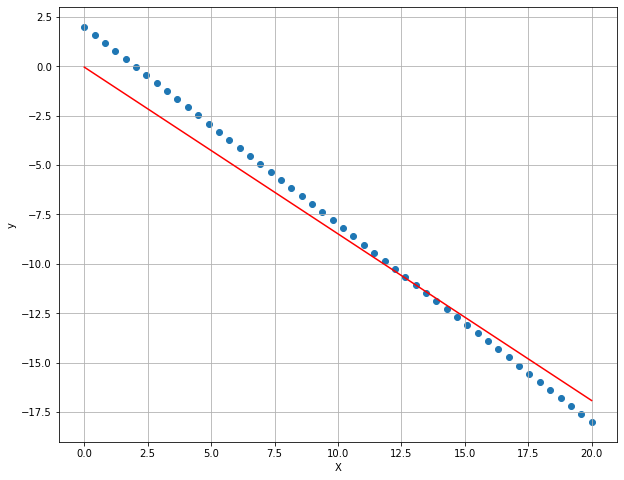

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [155]:
def MGD(X,y,alpha,gamma,iterations):
    theta_0 = 0
    theta_1 = 0
    m_0=0
    m_1=0
    hypothesises=[]
    tolerance = 0.0001
    m= len(X)
    theta_1s=[]
    theta_0s=[]
    loss=[]
    for i in range(iterations):
        # print('**************** Iteration ',i,'****************')
        h_x= theta_0 +theta_1*X
        # print('h(x): ',h_x)
        hypothesises.append(h_x)

        e = h_x - y
        # print("error vector :\n",e)
        
        
        j=(1/(2*m))*e@e
        # print("j = ",j)
        loss.append(j)
        theta_0s.append(theta_0)
        theta_1s.append(theta_1)
        
        d_theta_0 = (1/m)*e.sum()
        d_theta_1 = (1/m)*(e@X)
        # print('d_theta_0 :',d_theta_0)

        grad_vec= np.array([d_theta_0 , d_theta_1])
        # print('gradient_vector_norm:',LA.norm(grad_vec))
        if (i > 0):
            if((np.linalg.norm(grad_vec)<=tolerance ) and (abs(loss[i-1]- loss[i]) < 0.01)):
                # print('using convergence check')
                break
        else:
            if(np.linalg.norm(grad_vec)<=tolerance):
                break
        m_0= gamma*m_0 + alpha*d_theta_0
        m_1= gamma*m_1 + alpha*d_theta_1

        theta_0 = theta_0 - m_0
        theta_1 = theta_1 - m_1
    print('theta_0_new :',theta_0)
    print('theta_1_new :',theta_1)
    print('epoch number: ',i)
    return theta_0,theta_1,theta_0s,theta_1s, loss , hypothesises



In [156]:
theta_0,theta_1,theta_0s,theta_1s, loss , hypothesises = MGD(X=X,y=y,alpha=0.0005,iterations=300,gamma=0.01)

theta_0_new : 0.015567597333373678
theta_1_new : -0.8523902025410105
epoch number:  299


0.5072996176861211

In [154]:
alpha = 0.0005
gamma = 0.01
max_iter = 300
theta_0, theta_1, theta_0_list, theta_1_list, loss = momentGD(X,y,alpha,gamma,max_iter)

********************* Training Report *************************

Gradient Descent converged after 300 iterations

cost= 1268.2490442153028 

Gradient Vector [-0.5084002   0.03781685] 

Gradient Vector Norm: 0.509804746579464 

optimal theta_0: 0.015567597333373678
optimal theta_1: -0.8523902025410105


In [161]:
alpha=0.0005
gama = 0.01
max_iter = 3000
m = len(X)
theta_0=0
theta_1=0
m0=0
m1=0
theta_0_list = []
theta_1_list = []
loss = []

for i in range(max_iter):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)

    h_x = theta_0 + theta_1*X
    e = (h_x - y)
    # J= (1/2*m)*(np.vdot(e,e))
    J=(1/(2*m))*e@e
    loss.append(J)

    gred_theta_0 = (e.sum())/m
    gred_theta_1 = (np.vdot(X,e))/m

    grad_vec = np.array([gred_theta_0,gred_theta_1])
    grad_vec_norm = np.linalg.norm(grad_vec)

    if (i > 0):
        if((np.linalg.norm(grad_vec)<=0.0001 ) and (abs(loss[i-1]- loss[i]) < 0.01)):
            print('using convergence check')
            break
    else:
        if(np.linalg.norm(grad_vec)<=0.0001):
            break
    m0 = (gamma*0) + (alpha*gred_theta_0)
    theta_0 = theta_0 - m0
    m1 = (gamma*0) + (alpha*gred_theta_1)
    theta_1 = theta_1 - m1

print("********************* Training Report *************************\n")
print(f'Gradient Descent converged after {i+1} iterations\n')
print('cost=',J,'\n')
print('Gradient Vector',grad_vec,'\n')
print('Gradient Vector Norm:',grad_vec_norm,'\n')
print(f'optimal theta_0: {theta_0}\noptimal theta_1: {theta_1}')


********************* Training Report *************************

Gradient Descent converged after 3000 iterations

cost= 0.25421839160069515 

Gradient Vector [-0.35989593  0.02677046] 

Gradient Vector Norm: 0.36089020132586225 

optimal theta_0: 0.595220737144896
optimal theta_1: -0.8955070570833191


In [175]:
alpha = 0.0005
gamma = 0.9
max_iter = 30000
theta_0, theta_1, theta_0_list, theta_1_list, loss = momentGD(X,y,alpha,gamma,max_iter)

********************* Training Report *************************

Gradient Descent converged after 80 iterations

cost= 0.45813974603162605 

Gradient Vector [-0.51772523 -0.434894  ] 

Gradient Vector Norm: 0.6761451045823845 

optimal theta_0: 0.11535974085878038
optimal theta_1: -0.8633084968227093


# Hide

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

# End Hide

In [176]:
y_pred = theta_0 + theta_1*X
r2_score(y,y_pred)

0.973589591111118

r2_score 0.973589591111118


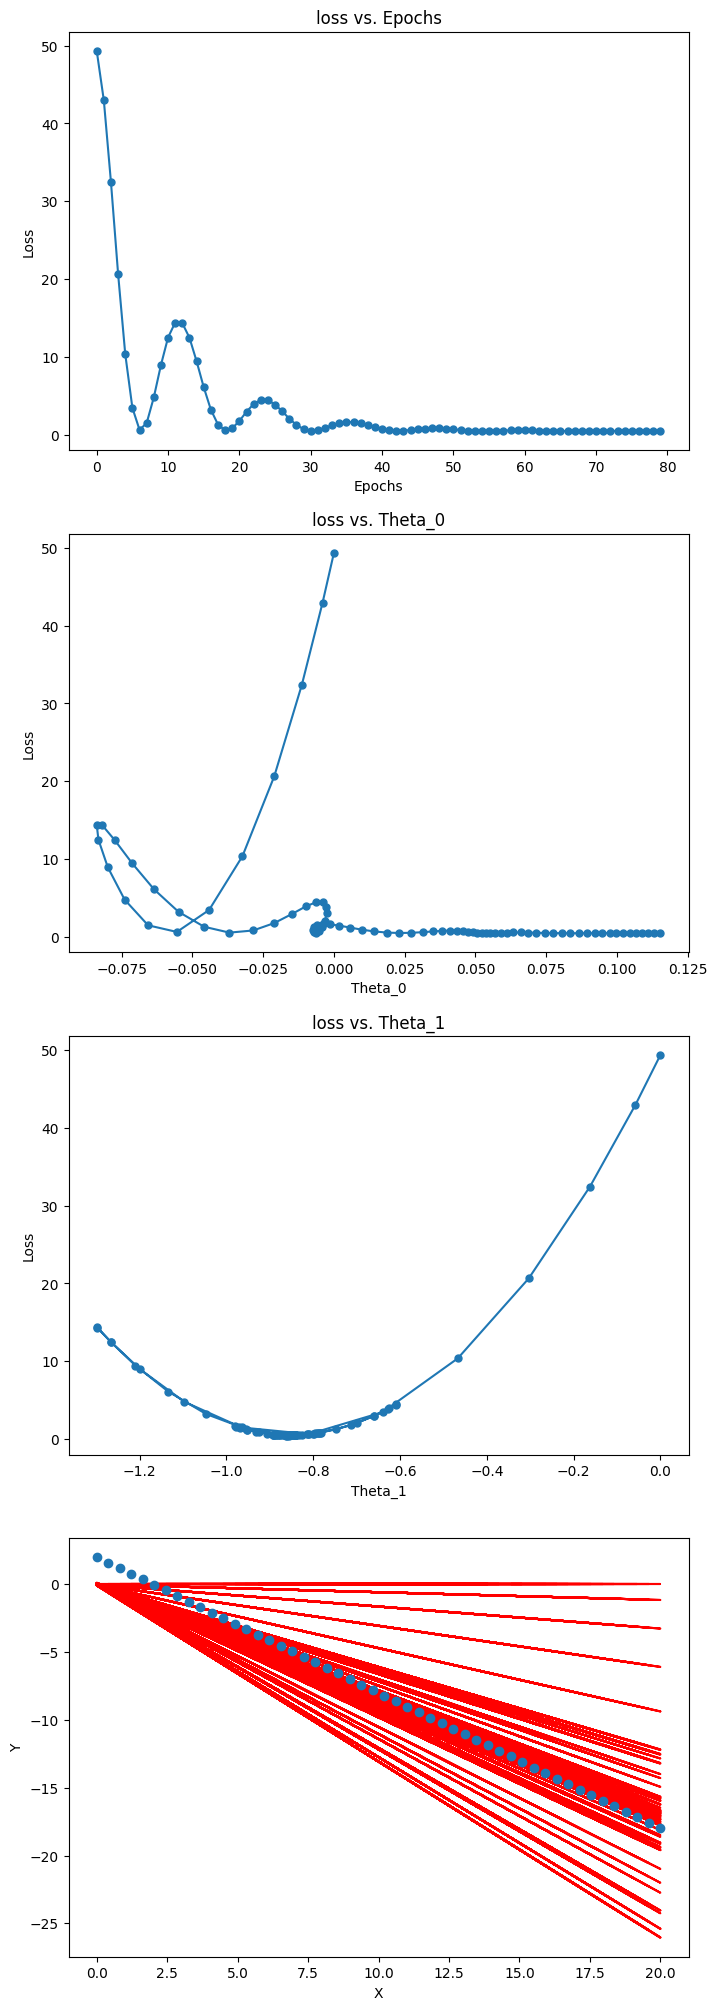

In [177]:
# gamma =0.9
plots(loss,theta_0_list,theta_1_list,X,y,80)

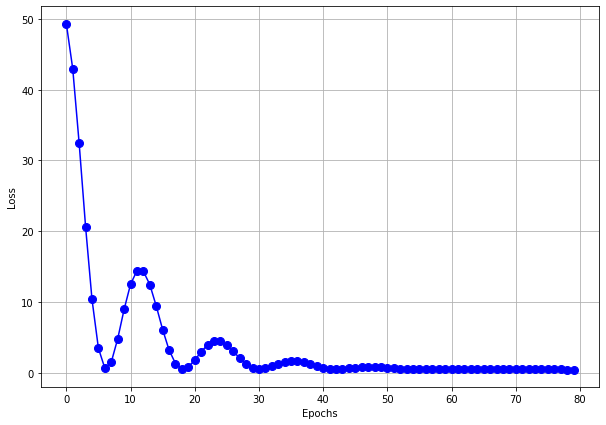

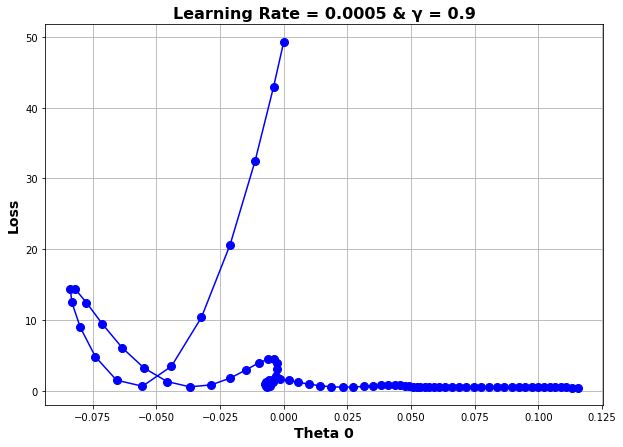

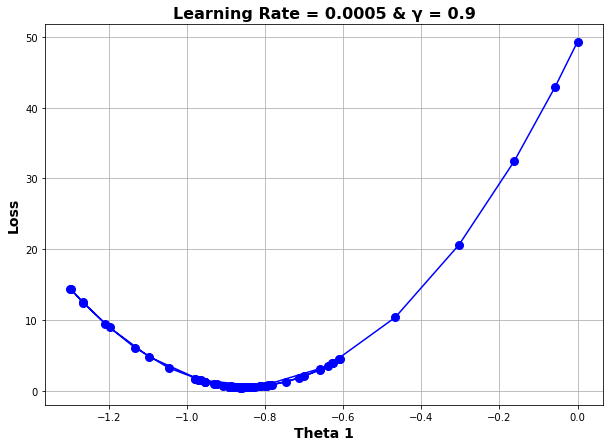

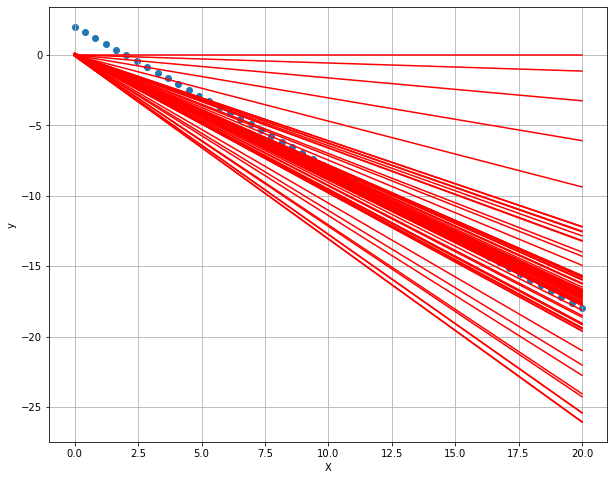

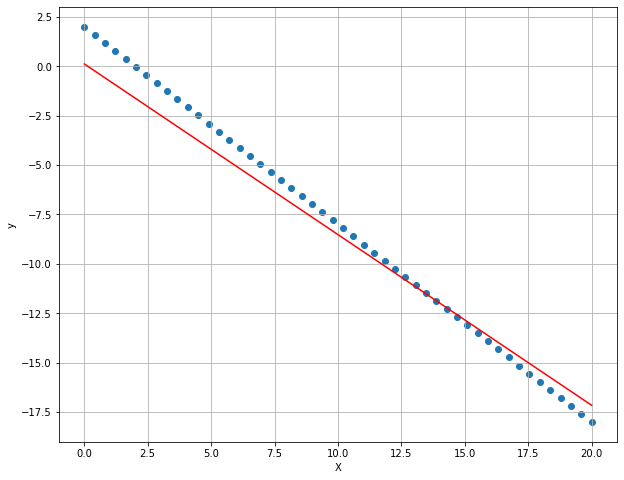

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [178]:
alpha = 0.0005
gamma = 0.89
max_iter = 30000
theta_0, theta_1, theta_0_list, theta_1_list, loss = momentGD(X,y,alpha,gamma,max_iter)

********************* Training Report *************************

Gradient Descent converged after 68 iterations

cost= 0.47815856527919187 

Gradient Vector [-0.4577937   0.51199208] 

Gradient Vector Norm: 0.6868121695240047 

optimal theta_0: 0.07510910879253063
optimal theta_1: -0.8532902805303634


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

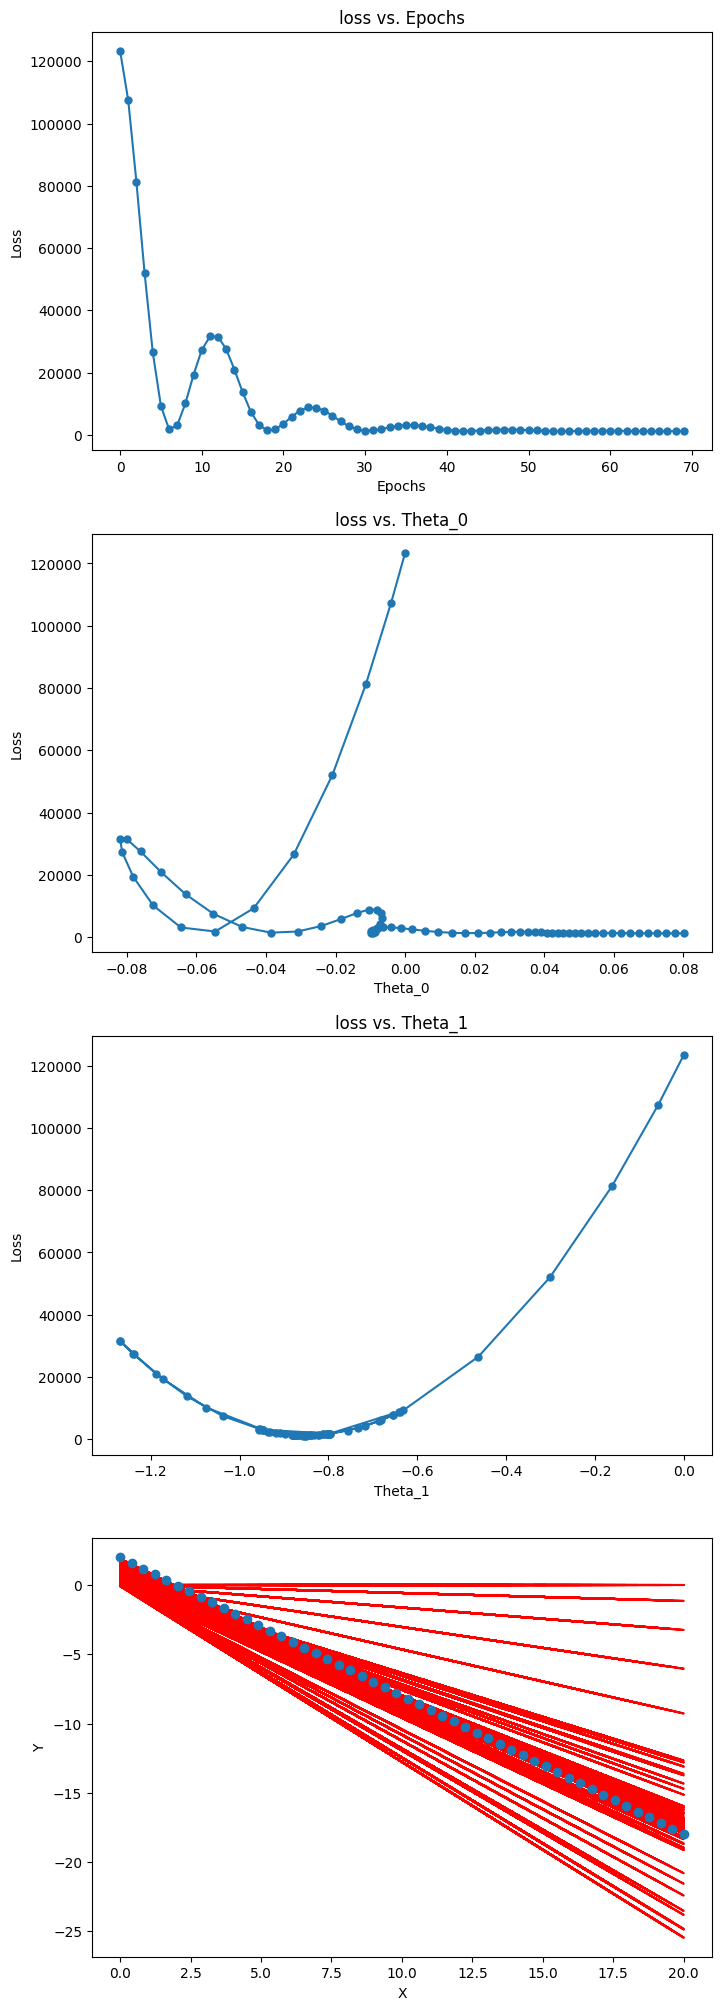

In [144]:
# gamma = 0.89
plots(loss,theta_0_list,theta_1_list,X,y,70)

In [180]:
y_prd = theta_0 + theta_1*X
r2_score(y,y_prd)

0.972435565060376

r2 score =  0.972435565060376


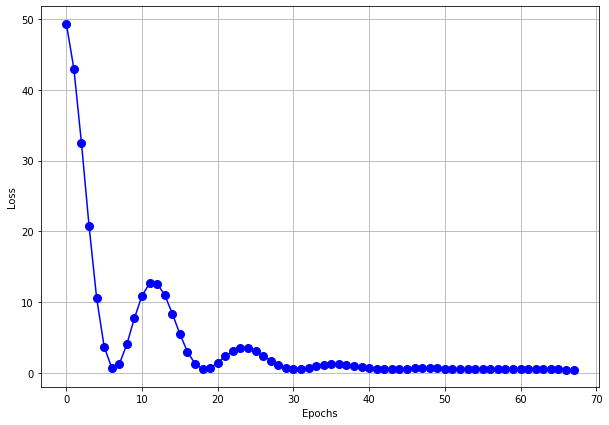

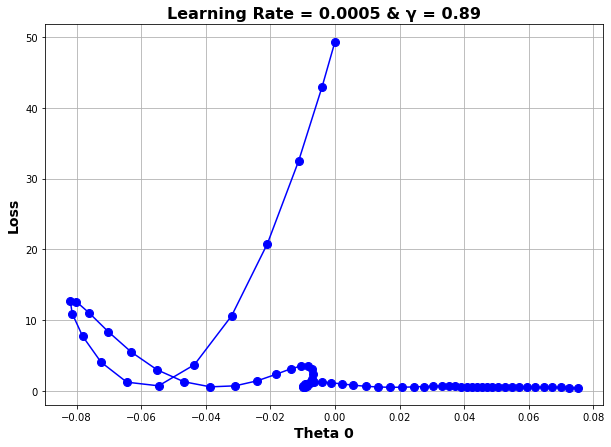

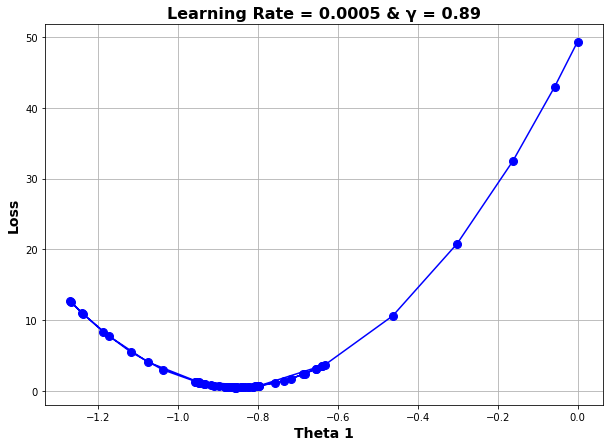

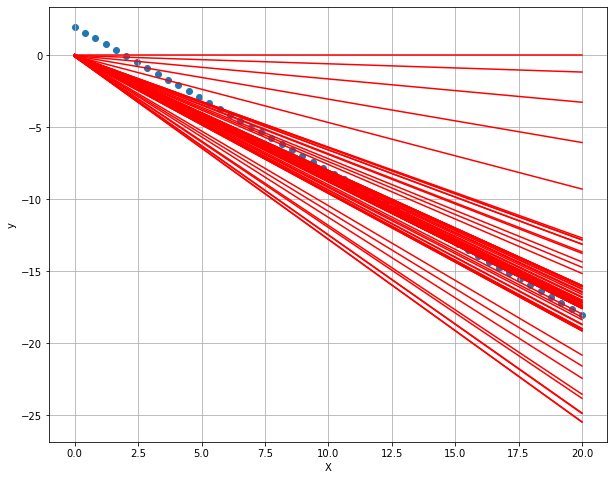

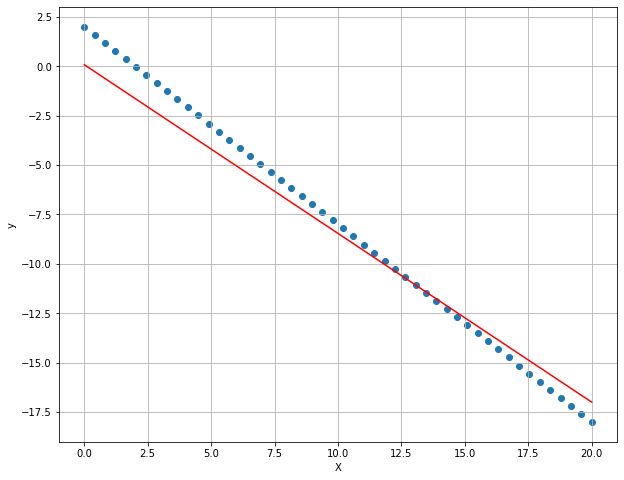

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [187]:
alpha = 0.0005
gamma = 0.01
max_iter = 300
theta_0, theta_1, theta_0_list, theta_1_list, loss = momentGD(X,y,alpha,gamma,max_iter)

********************* Training Report *************************

Gradient Descent converged after 65 iterations

cost= 0.544693932220795 

Gradient Vector [-0.43283113  1.26592157] 

Gradient Vector Norm: 1.3378715230948512 

optimal theta_0: -0.04528648812924383
optimal theta_1: -0.8387544642147547


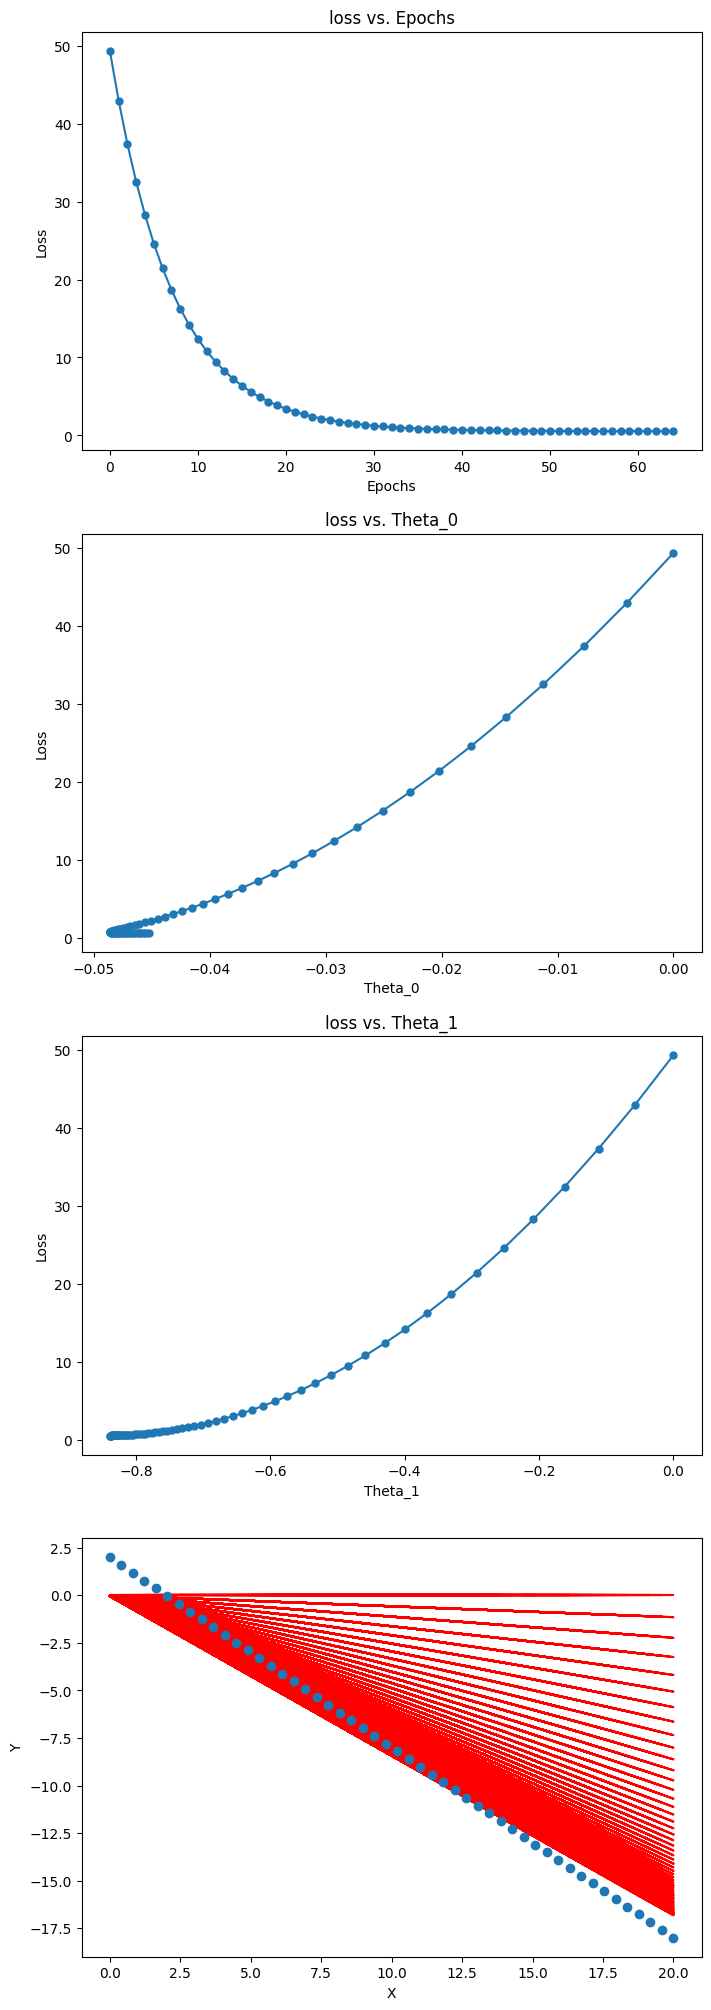

In [189]:
#gamma = 0.01
plots(loss,theta_0_list,theta_1_list,X,y,300)

********************* Training Report *************************

Gradient Descent converged after 66 iterations

cost= 0.5444197405452696 

Gradient Vector [-0.43465438  1.24108031] 

Gradient Vector Norm: 1.3149923078513828 

optimal theta_0: -0.04520484208674774
optimal theta_1: -0.8389449533386489


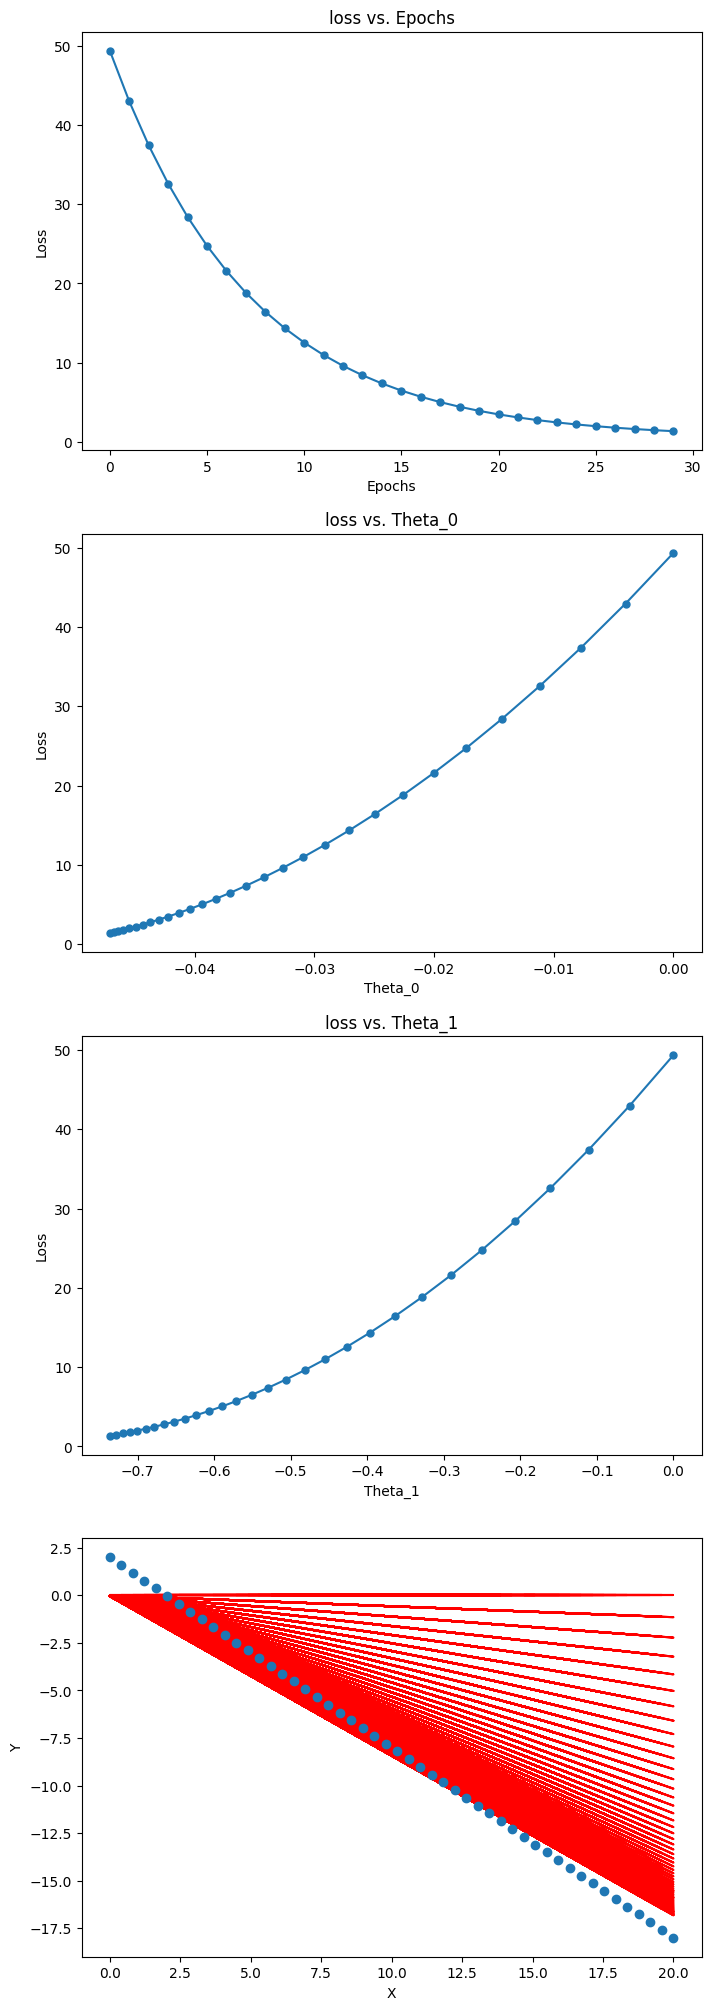

In [190]:
alpha = 0.0005
gamma = 0.0
max_iter = 300
theta_0, theta_1, theta_0_list, theta_1_list, loss = momentGD(X,y,alpha,gamma,max_iter)
# gamma = 0.0
plots(loss,theta_0_list,theta_1_list,X,y,30)

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [228]:
def NAG(X,y,alpha,gamma,max_iter):

    m = len(X)
    theta_0=0
    theta_1=0
    theta_0_temp = theta_1_temp = 0
    v0=0
    v1=0
    theta_0_list = []
    theta_1_list = []
    loss = []

    for i in range(max_iter):
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        theta_0_temp = theta_0 - (gamma*v0)
        theta_1_temp = theta_1 -(gamma*v1)
        
        h_temp = theta_0_temp + theta_1_temp*X
        e = (h_temp - y)
        J= (1/(2*m))*e@e
        loss.append(J)

        gred_theta_0 = (e.sum())/m
        gred_theta_1 = (e@X)/m
        

        grad_vec = np.array([gred_theta_0,gred_theta_1])
        grad_vec_norm = np.linalg.norm(grad_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or grad_vec_norm < 0.001):            
            break
        
        else:
            # theta_0_temp = theta_0 - (gamma*v0)
            theta_0 = theta_0_temp - alpha*gred_theta_0
            v0 = (gamma*v0) - alpha*theta_0_temp
            
            # theta_1_temp = theta_1 -(gamma*v1)
            theta_1 = theta_1_temp - alpha*gred_theta_1
            v1 = (gamma*v1) - alpha*theta_1_temp


    print("********************* Training Report *************************\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('cost=',J,'\n')
    print('Gradient Vector',grad_vec,'\n')
    print('Gradient Vector Norm:',grad_vec_norm,'\n')
    print(f'optimal theta_0: {theta_0}\noptimal theta_1: {theta_1}')
    return theta_0, theta_1, theta_0_list, theta_1_list, loss


##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [229]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = NAG(X,y,alpha=0.0005,gamma=0.9,max_iter=300)
# why theta_0 is negative !!!

********************* Training Report *************************

Gradient Descent converged after 45 iterations

cost= 0.5430541294794874 

Gradient Vector [ 0.53151081 -0.03494168] 

Gradient Vector Norm: 0.5326581048458698 

optimal theta_0: -0.0532218468312009
optimal theta_1: -0.8443264756981297


# Hide 

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

# End Hide

In [227]:
y_pred = theta_1*X + abs(theta_0)
r2_score(y,y_pred)

0.9851254759827675

r2_score 0.971103130756324


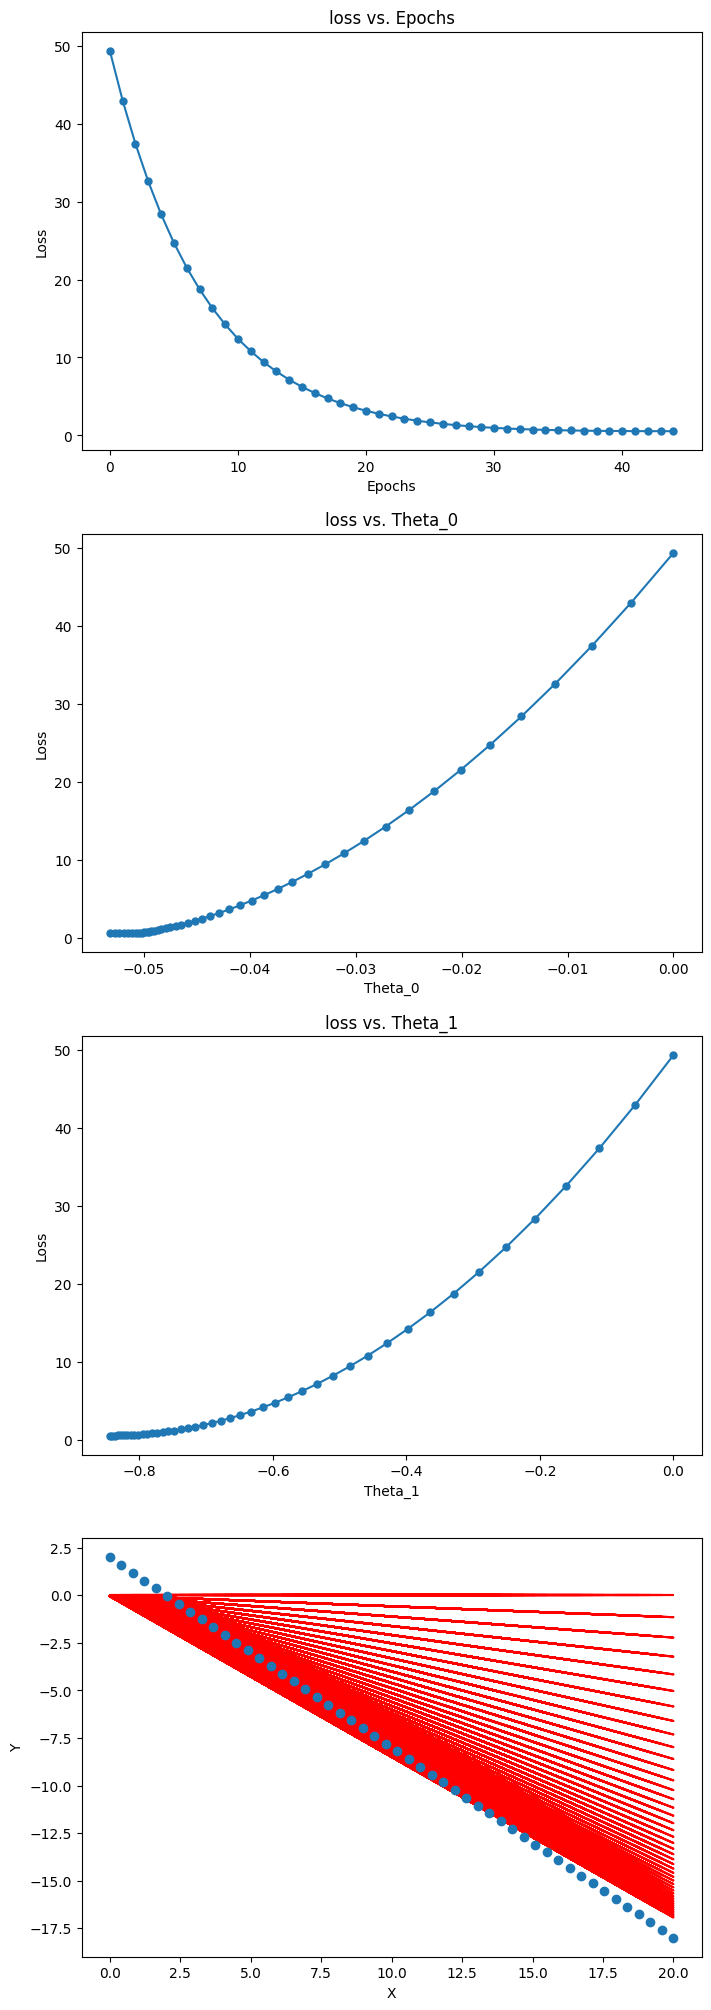

In [231]:
plots(loss,theta_0_list,theta_1_list,X,y,300)

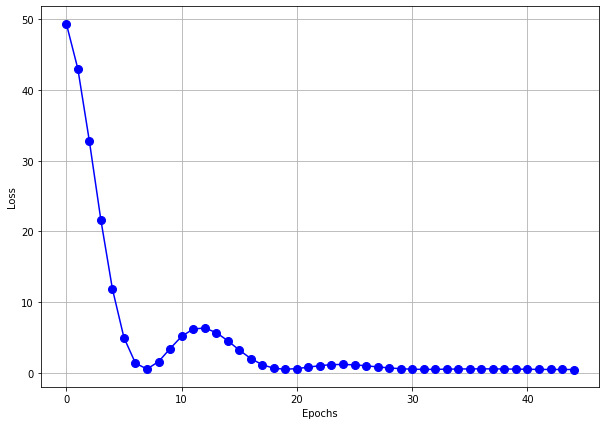

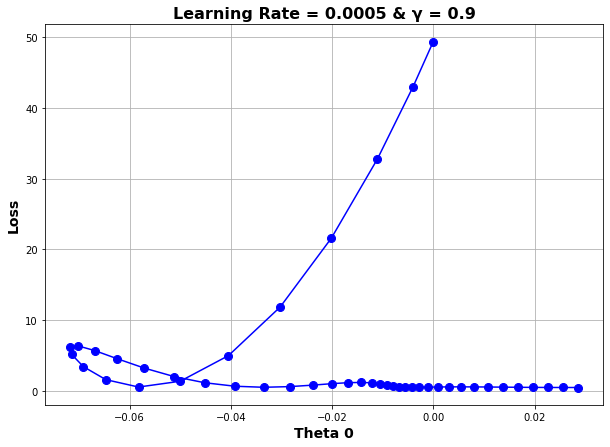

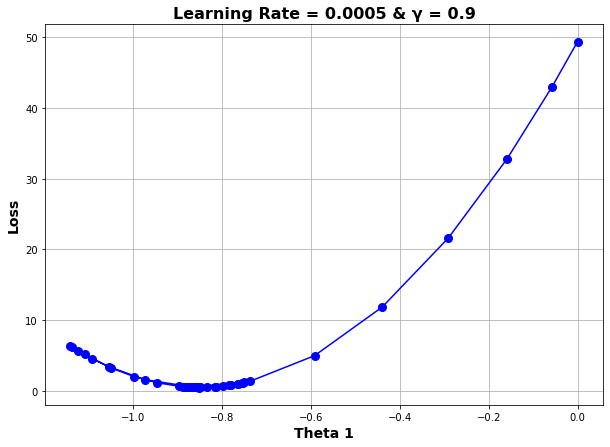

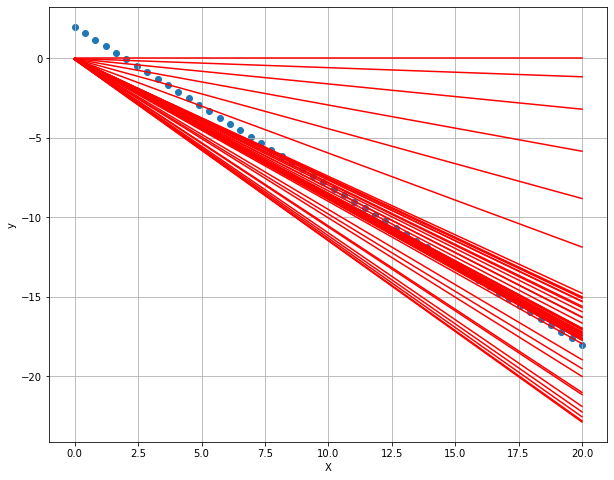

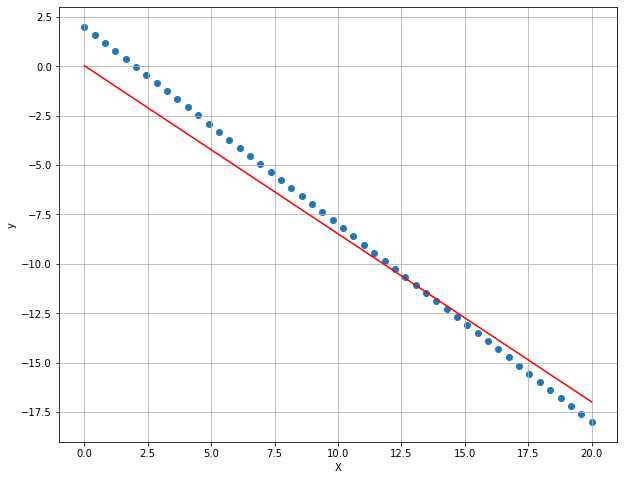

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [236]:
theta_0, theta_1, theta_0_list, theta_1_list, loss = NAG(X,y,alpha=0.0005,gamma=0.89,max_iter=300)

********************* Training Report *************************

Gradient Descent converged after 46 iterations

cost= 0.543068030515369 

Gradient Vector [ 0.53363332 -0.06350799] 

Gradient Vector Norm: 0.5373990958454926 

optimal theta_0: -0.05324720516061243
optimal theta_1: -0.8448264949744289


# Hide 

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

# End Hode 

In [237]:
y_pred = theta_0 + theta_1*X
r2_score(y,y_pred)

0.9686716494355199

r2 score =  0.9699718983158406


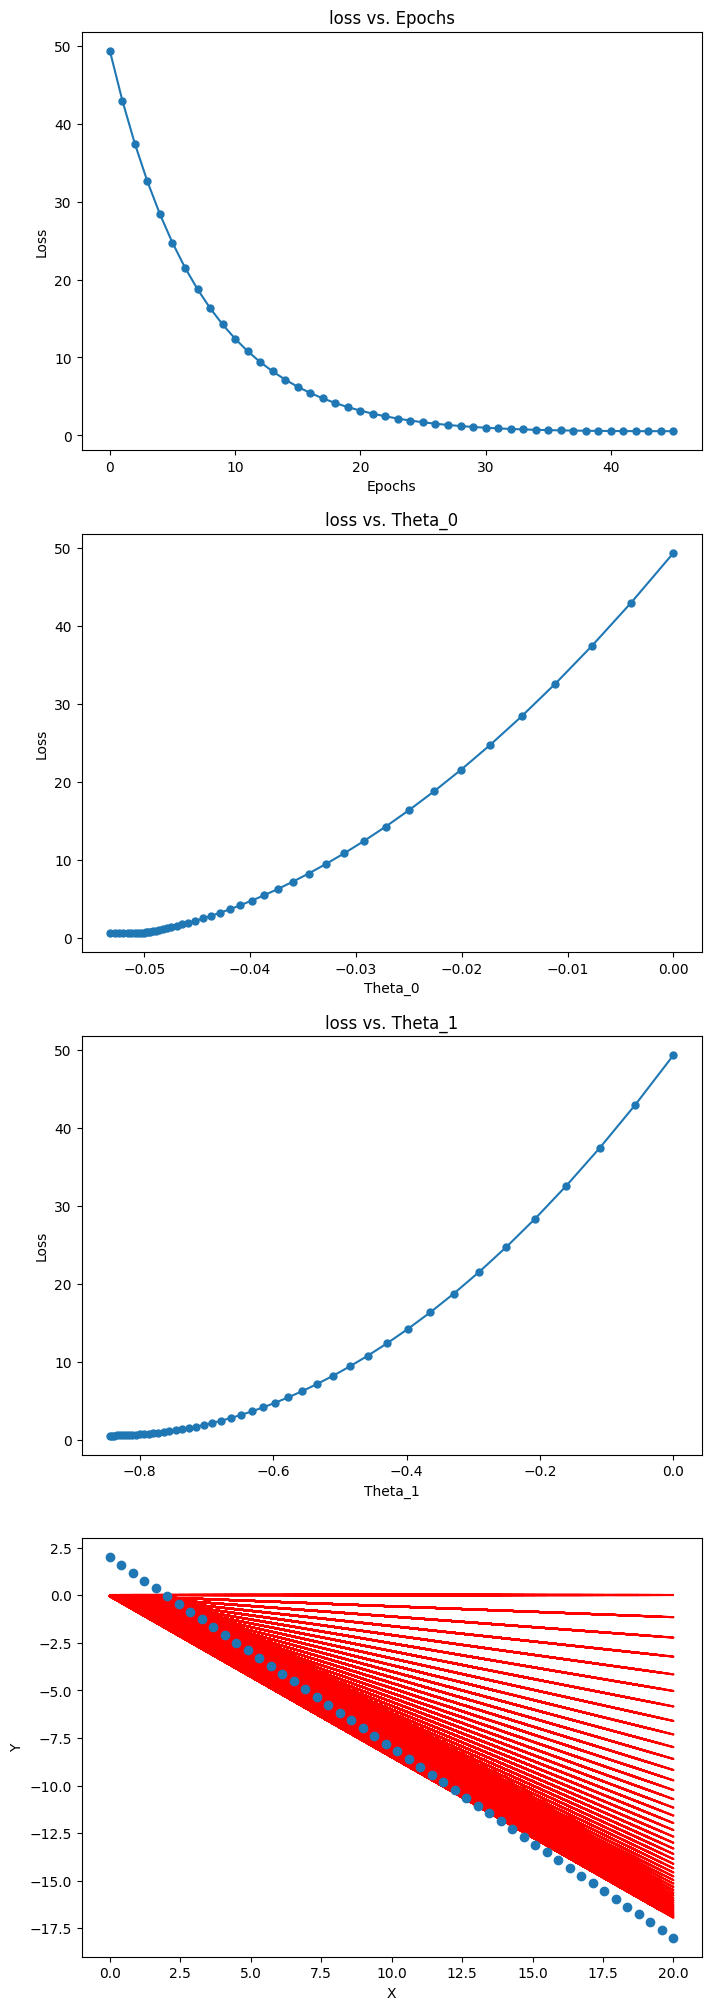

In [ ]:
plots(loss,theta_0_list,theta_1_list,X,y,300)

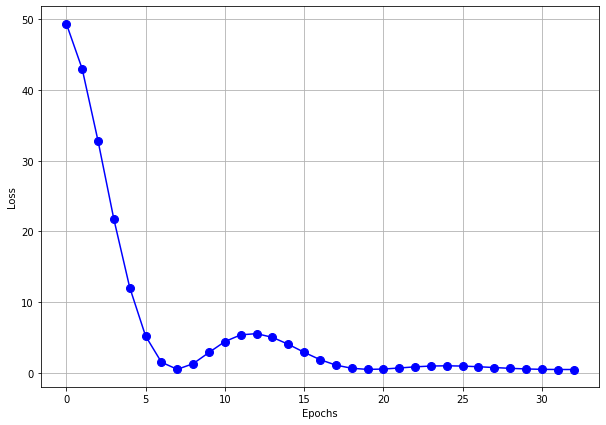

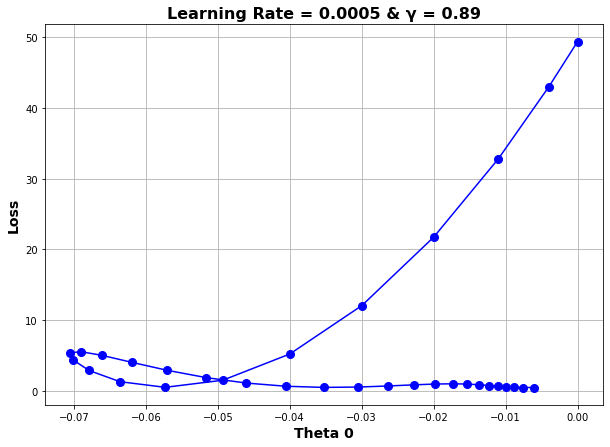

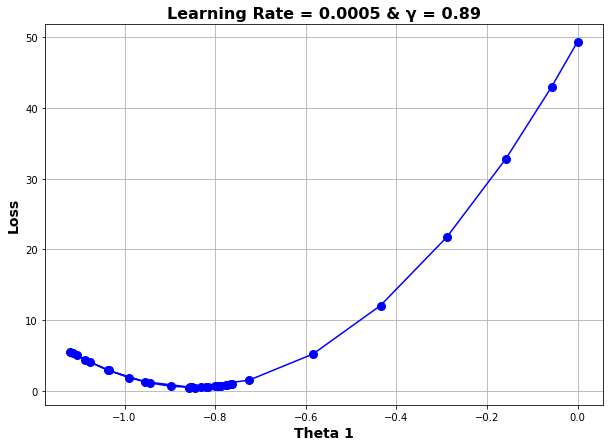

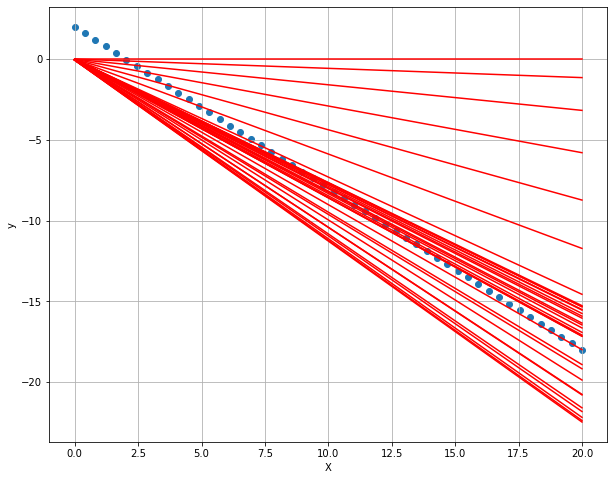

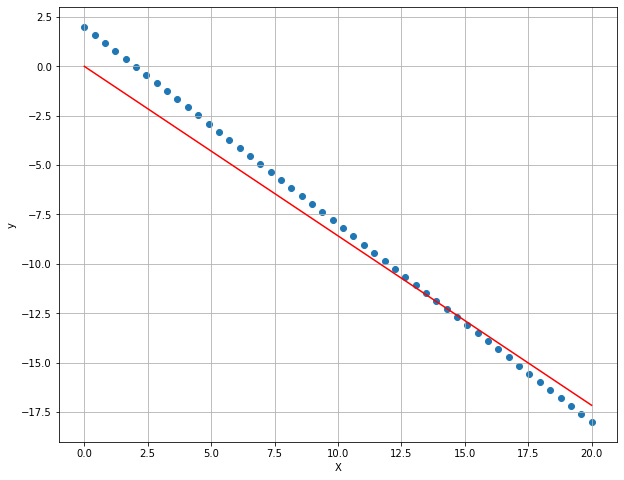